<a href="https://colab.research.google.com/github/MattWroclaw/neural-networks/blob/main/03_keras/06_saving_model_with_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zapisywanie i ładowanie wag z modelu

Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:
 - zapisanie wag po każdej epoce
 - zapisanie wag po określonej liczbie epok
 - załadowanie wag
 - zapisanie całego modelu
 - załadowanie całego modelu

### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Zapisywanie punktów kontrolnych podczas trenowania](#a3)
5. [Załadowanie wag do modelu](#a4)
6. [Dodatkowe opcje](#a5)
7. [Ręczne zapisywanie wag](#a6)
8. [Zapisanie całego modelu](#a7)




In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__

'2.17.0'

### <a name='a1'> </a> 2. Załadowanie danych i wstępna eksploracja

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

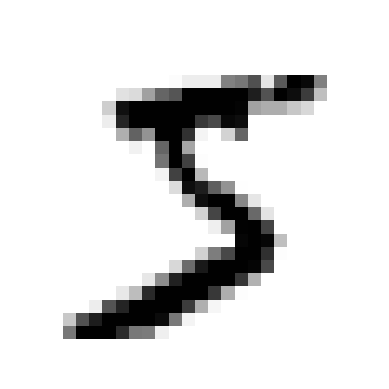

In [5]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

### <a name='a2'> </a> 3. Budowa modelu

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### <a name='a3'> </a> 4. Zapisywanie punktów kontrolnych podczas trenowania

In [14]:
checkpoint_path = 'training/.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels,
          epochs=10, validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Epoch 1/10
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0291
Epoch 1: saving model to training/.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0293 - val_accuracy: 0.8670 - val_loss: 0.4134
Epoch 2/10
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0237
Epoch 2: saving model to training/.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0237 - val_accuracy: 0.8740 - val_loss: 0.4038
Epoch 3/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0181
Epoch 3: saving model to training/.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.8700 - val_loss: 0.4318
Epoch 4/10
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0155
Epoch 4: saving model to training/.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0.8700 - val_loss: 0.4069
Epoch 5/10
29/32 ━

In [23]:
model.save('my_model.keras')

In [25]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

In [26]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 1s - 26ms/step - accuracy: 0.8690 - loss: 0.4245
Restored model, accuracy: 86.90%
